## Aprendizaje Estadístico 2024
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Load data

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']

In [3]:
colors = {0:'red', 1:'blue', 2:'green'}
c = []
for i in range(0, len(y)):
    c.append(colors[y[i]])

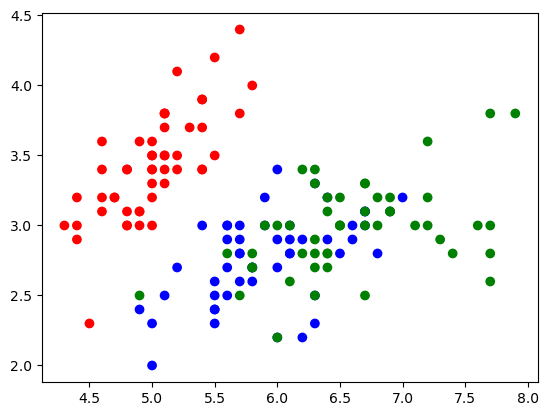

In [4]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=c)
plt.show()

In [5]:
# separamos en clases 0, 1, 2
y0 = np.argwhere(y==0)
y1 = np.argwhere(y==1)
y2 = np.argwhere(y==2)

X0 = X[y0]
X1 = X[y1]
X2 = X[y2]

# extract class 0 and 1
X01 = np.vstack([X0,X1]).reshape(-1,4)
y01 = np.stack(np.array(50*[0] + 50*[1]))

# extract class 1 and 2
X12 = np.vstack([X1,X2]).reshape(-1,4)
y12 = np.stack(np.array(50*[0] + 50*[1]))

In [6]:
print(X.shape, y.shape)
print(X01.shape, y01.shape)
print(X12.shape, y12.shape)

(150, 4) (150,)
(100, 4) (100,)
(100, 4) (100,)


## Árboles de Decisión

### Experimento 1: Clase 0 y 1, Profundidad 1

In [7]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=1, random_state=2022)

In [8]:
model.fit(X01[:,[0,1]], y01)

DecisionTreeClassifier(max_depth=1, random_state=2022)

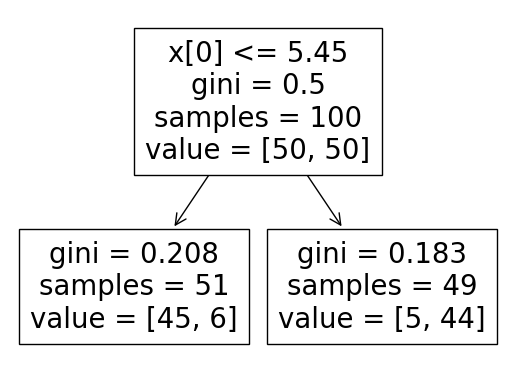

In [9]:
plt.figure()
plot_tree(model)
plt.show()

In [10]:
yhat = model.predict(X01[:,[0,1]])
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [11]:
cfmatrix = confusion_matrix(y01, yhat)
print(cfmatrix)

[[45  5]
 [ 6 44]]


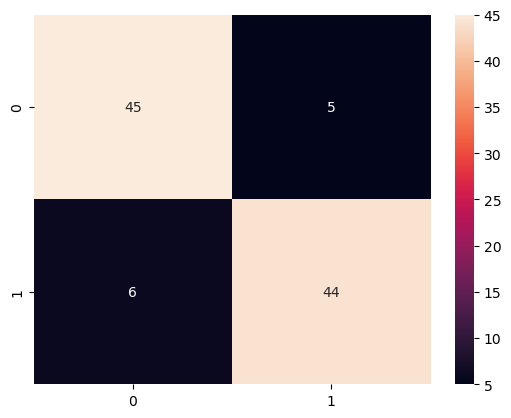

In [12]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [13]:
print(classification_report(y01, yhat))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



## Regiones de clasificación

In [14]:
# Plotting decision regions
h = 0.01
x_min, x_max = X01[:,0].min() - 1, X01[:,0].max() + 1
y_min, y_max = X01[:,1].min() - 1, X01[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

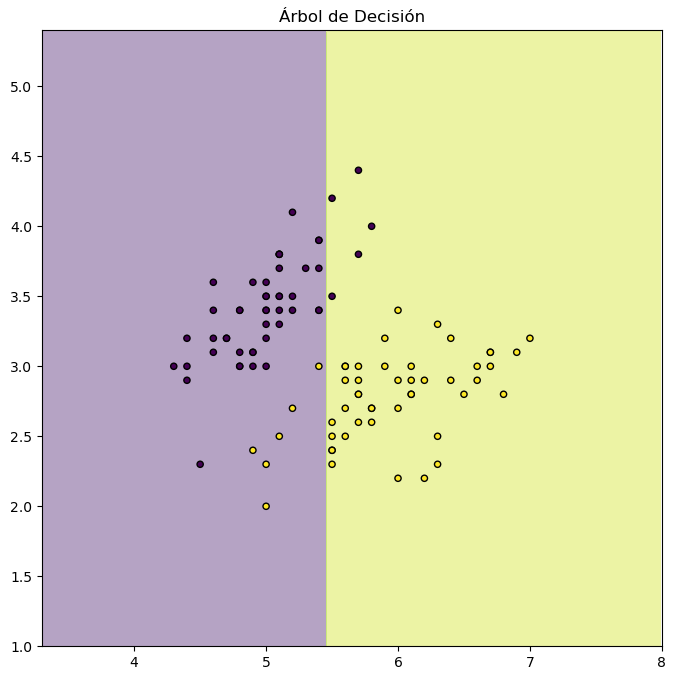

In [15]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X01[:,0], X01[:,1], c=y01, s=20, edgecolor='k')
plt.title('Árbol de Decisión')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

### Experimento 2: Clase 0 y 1, Profundidad 2

In [16]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, random_state=2022)

In [17]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [18]:
model.fit(X01[:,[0,1]], y01)

DecisionTreeClassifier(max_depth=2, random_state=2022)

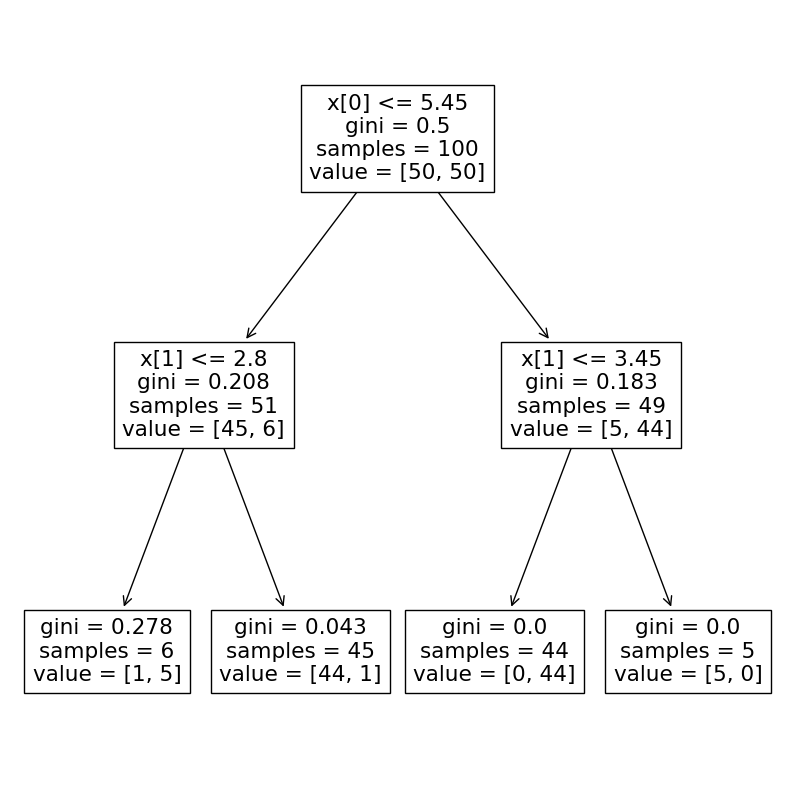

In [19]:
plt.figure(figsize=(10,10))
plot_tree(model)
plt.show()

In [20]:
yhat = model.predict(X01[:,[0,1]])
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
cfmatrix = confusion_matrix(y01, yhat)
print(cfmatrix)

[[49  1]
 [ 1 49]]


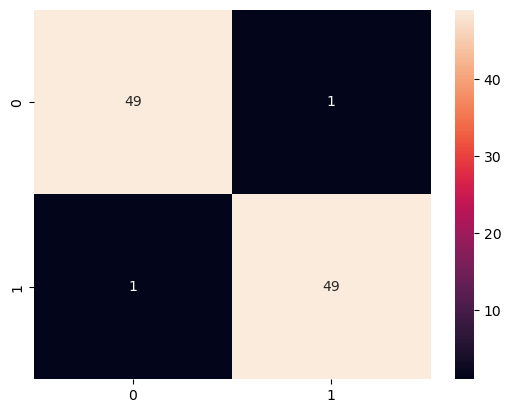

In [22]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [23]:
print(classification_report(y01, yhat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## Regiones de clasificación

In [24]:
# Plotting decision regions
h = 0.01
x_min, x_max = X01[:,0].min() - 1, X01[:,0].max() + 1
y_min, y_max = X01[:,1].min() - 1, X01[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

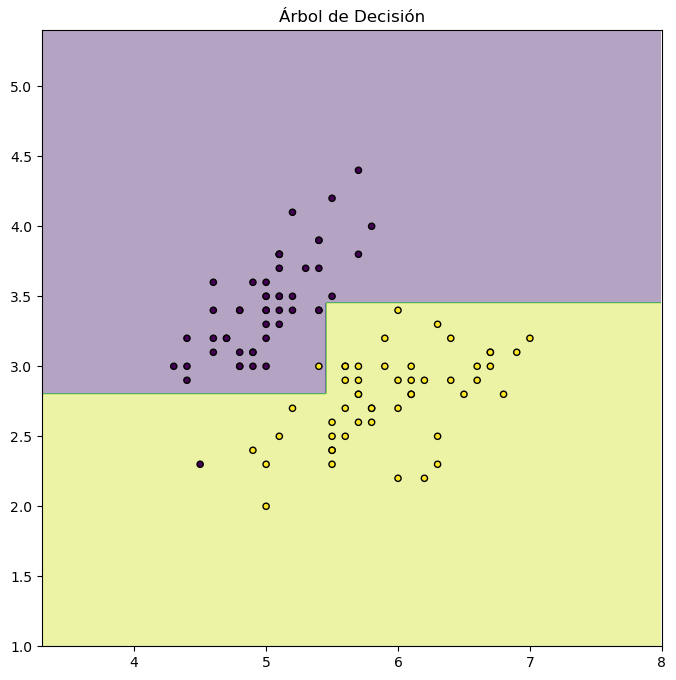

In [25]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X01[:,0], X01[:,1], c=y01, s=20, edgecolor='k')
plt.title('Árbol de Decisión')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

### Experimento 3: Clase 0 y 1, Profundidad 3

In [26]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, random_state=None)

In [27]:
model.fit(X01[:,[0,1]], y01)

DecisionTreeClassifier(max_depth=4)

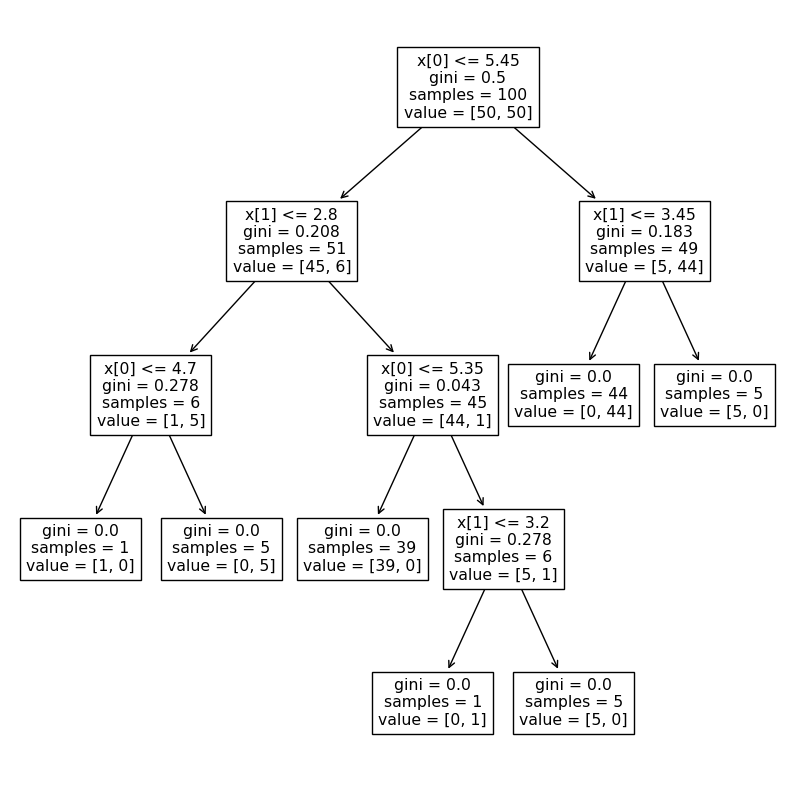

In [28]:
plt.figure(figsize=(10,10))
plot_tree(model)
plt.show()

In [29]:
yhat = model.predict(X01[:,[0,1]])
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
cfmatrix = confusion_matrix(y01, yhat)
print(cfmatrix)

[[50  0]
 [ 0 50]]


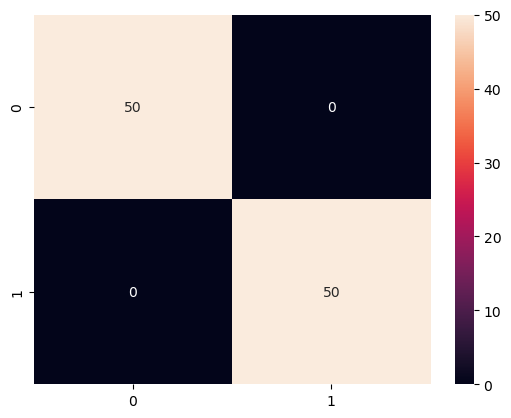

In [31]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [32]:
print(classification_report(y01, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Regiones de clasificación

In [33]:
# Plotting decision regions
h = 0.01
x_min, x_max = X01[:,0].min() - 1, X01[:,0].max() + 1
y_min, y_max = X01[:,1].min() - 1, X01[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

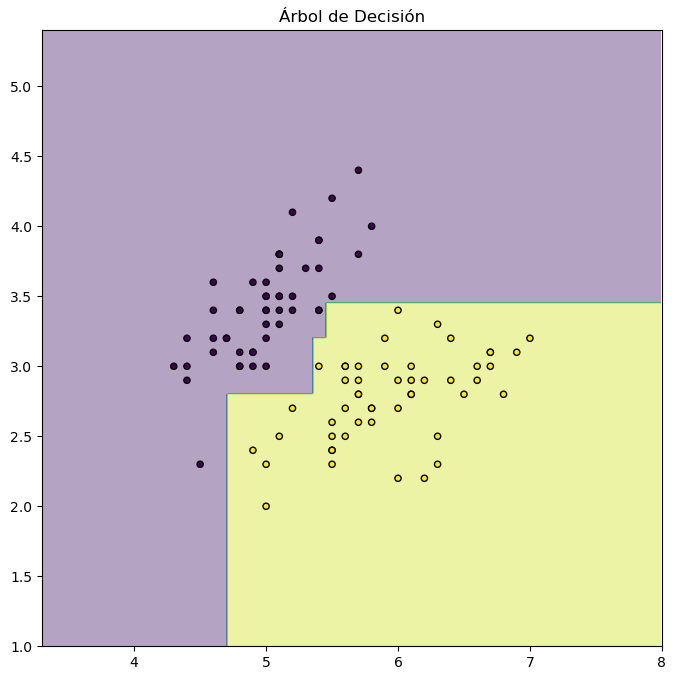

In [34]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X01[:,0], X01[:,1], c=y01, s=20, edgecolor='k')
plt.title('Árbol de Decisión')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

### Experimento 4: Clase 1 y 2, Profundidad 7

In [35]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=13, random_state=None)

In [36]:
model.fit(X12[:,[0,1]], y12)

DecisionTreeClassifier(max_depth=13)

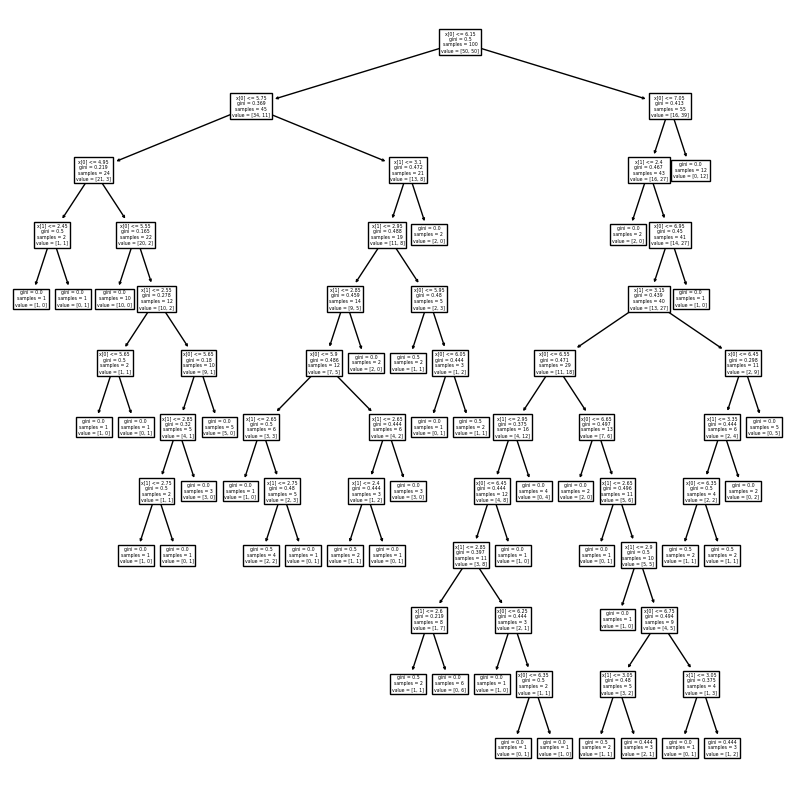

In [37]:
plt.figure(figsize=(10,10))
plot_tree(model)
plt.show()

In [38]:
yhat = model.predict(X12[:,[0,1]])
print(yhat)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0]


In [39]:
cfmatrix = confusion_matrix(y12, yhat)
print(cfmatrix)

[[49  1]
 [10 40]]


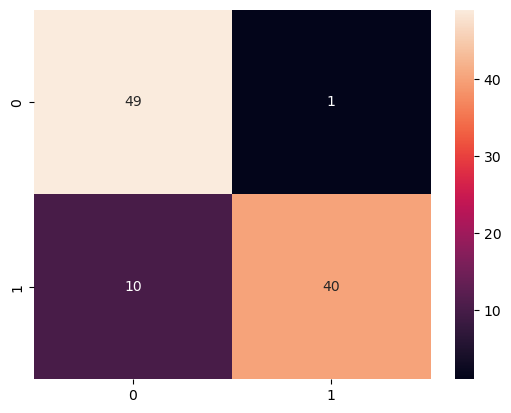

In [40]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [41]:
print(classification_report(y01, yhat))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        50
           1       0.98      0.80      0.88        50

    accuracy                           0.89       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.89      0.89       100



## Regiones de clasificación

In [42]:
# Plotting decision regions
h = 0.01
x_min, x_max = X12[:,0].min() - 1, X12[:,0].max() + 1
y_min, y_max = X12[:,1].min() - 1, X12[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

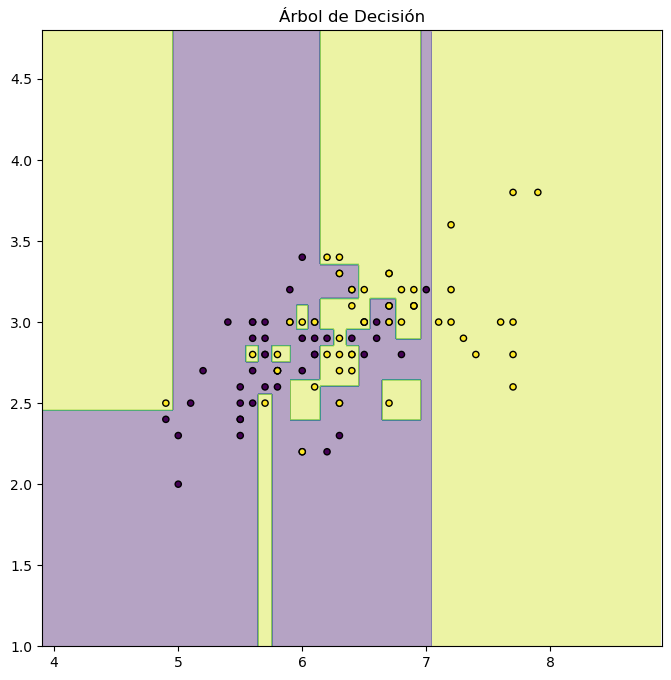

In [43]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X12[:,0], X12[:,1], c=y12, s=20, edgecolor='k')
plt.title('Árbol de Decisión')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

## Todos los datos

In [44]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, random_state=None)

In [45]:
model.fit(X[:,[0,1]], y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

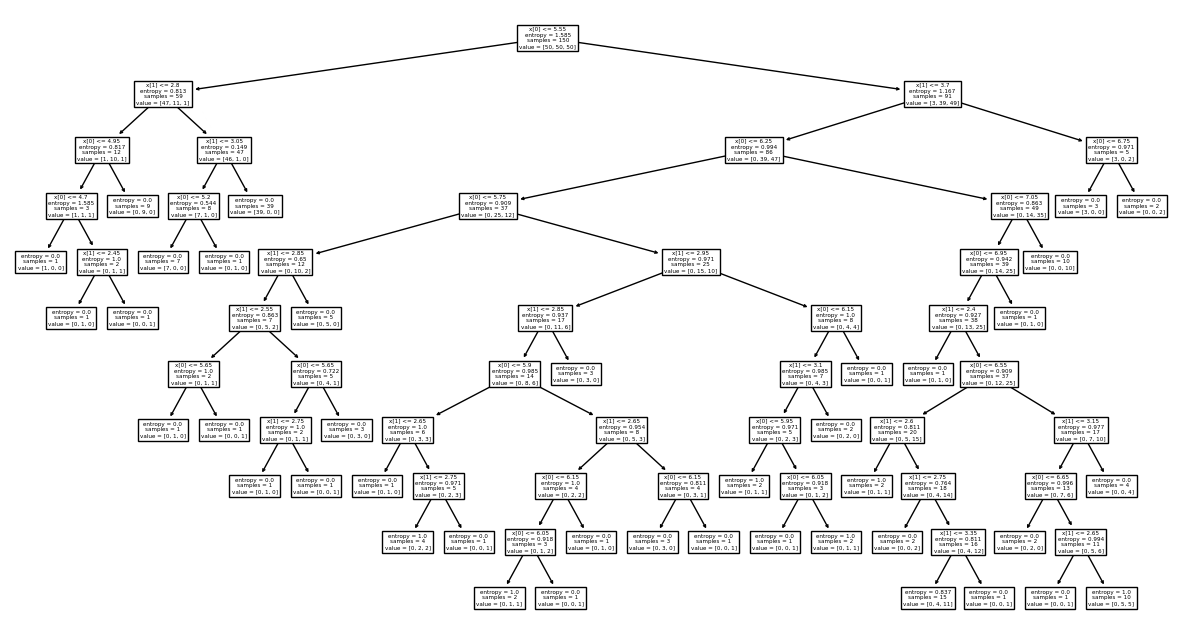

In [46]:
plt.figure(figsize=(15,8))
plot_tree(model)
plt.show()

In [47]:
yhat = model.predict(X[:,[0,1]])
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 1 1 2
 2 1]


In [48]:
model.predict(np.array([[3.2, 5.4]]))

array([0])

In [49]:
model.predict(np.array([[6.8, 4.4]]))

array([2])

In [50]:
cfmatrix = confusion_matrix(y, yhat)
print(cfmatrix)

[[50  0  0]
 [ 0 46  4]
 [ 0 11 39]]


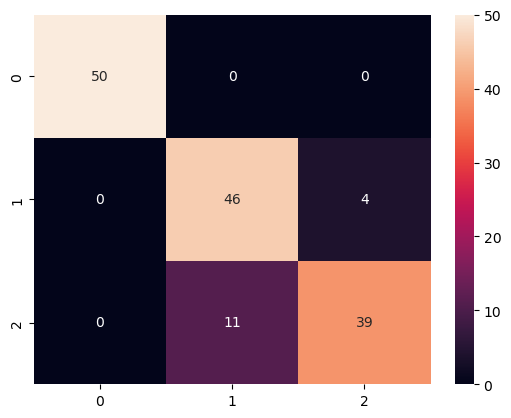

In [51]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [52]:
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.81      0.92      0.86        50
           2       0.91      0.78      0.84        50

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



## Regiones de clasificación

In [53]:
# Plotting decision regions
h = 0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

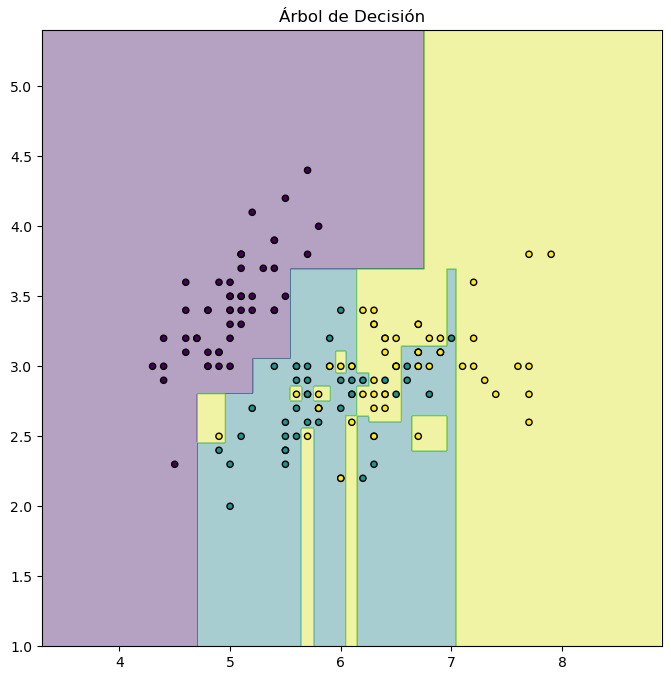

In [54]:
plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
plt.title('Árbol de Decisión')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

## Importancias

In [55]:
model.feature_importances_

array([0.65223432, 0.34776568])

#### Todas las variables

In [56]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4, random_state=None)

In [57]:
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

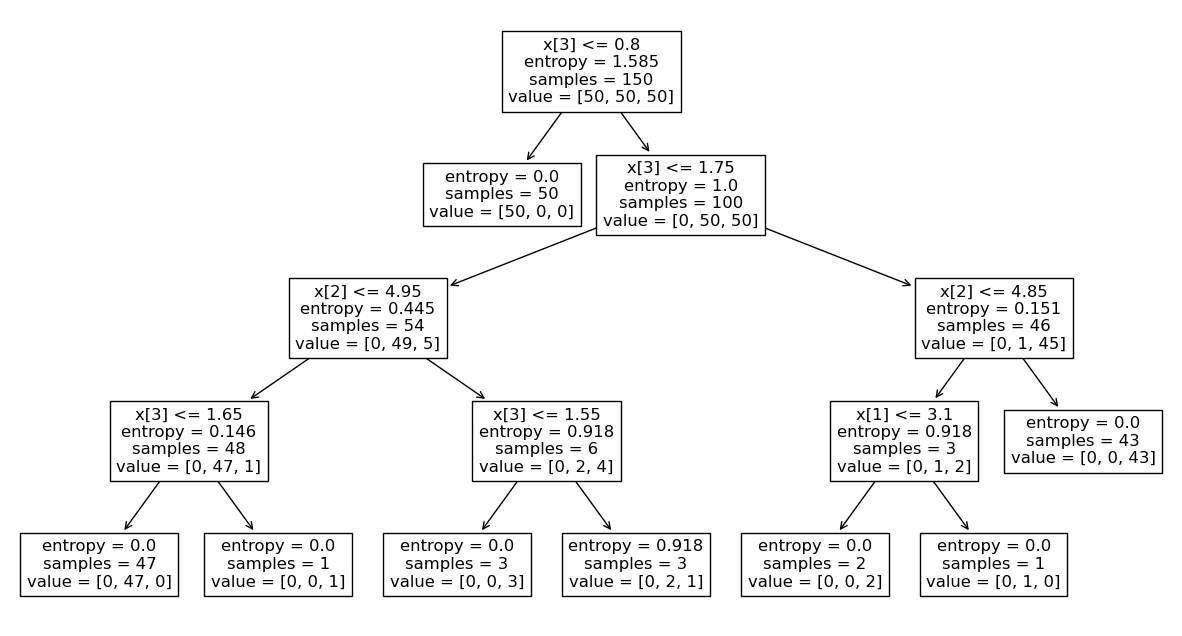

In [58]:
plt.figure(figsize=(15,8))
plot_tree(model)
plt.show()

In [59]:
yhat = model.predict(X)
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [60]:
cfmatrix = confusion_matrix(y, yhat)
print(cfmatrix)

[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]


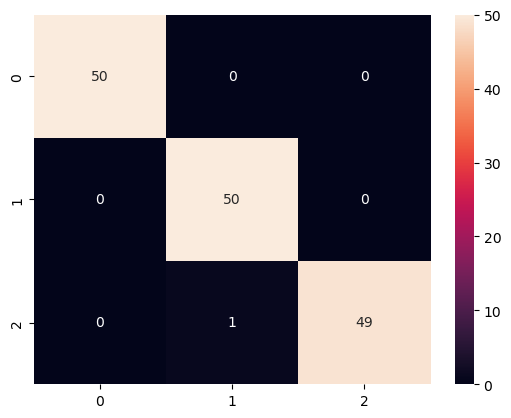

In [61]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [62]:
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [63]:
names = iris.feature_names
importances = model.feature_importances_

In [64]:
print(names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [65]:
idx = np.argsort(importances)[::-1]
for i in range (0, 4):
    print ('{}: {} - {}'.format(i+1, importances[idx[i]], names[idx[i]]))

1: 0.9214362135833396 - petal width (cm)
2: 0.06684033644351783 - petal length (cm)
3: 0.011723449973142591 - sepal width (cm)
4: 0.0 - sepal length (cm)
